# Cost of living index around the world

From the website: 
https://www.numbeo.com/cost-of-living/cpi_explained.jsp
"These indices are relative to New York City (NYC). Which means that for New York City, each index should be 100(%). If another city has, for example, rent index of 120, it means that on an average in that city rents are 20% more expensive than in New York City. If a city has rent index of 70, that means on average rent in that city is 30% less expensive than in New York City."


# questions

what are the most expensive countries by cost of living? least expensive? 
does the cost of groceries effect the cost of eating out? 
is there a correlation between rent cost and living cost? 


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('C:/Users/bourg/OneDrive/Documents/springboard/data storytelling/Cost_of_Living_Index_2022.csv')

In [36]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
2,2,Albania,35.5,8.47,22.83,29.32,25.82,30.19
3,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
4,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72


In [37]:
df.columns = df.iloc[0]



In [38]:
df = df.iloc[1: , :]
df.head()


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
2,2,Albania,35.5,8.47,22.83,29.32,25.82,30.19
3,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
4,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
5,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [39]:
df = df.drop('Rank', axis=1)


In [40]:
df = df.set_index('Country')

In [41]:
df = df.astype({'Cost of Living Index':'float','Rent Index':'float','Cost of Living Plus Rent Index':'float', 'Groceries Index':'float', 'Restaurant Price Index':'float', 'Local Purchasing Power Index':'float'})
df.dtypes

0
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cost of Living Index            139 non-null    float64
 1   Rent Index                      139 non-null    float64
 2   Cost of Living Plus Rent Index  139 non-null    float64
 3   Groceries Index                 139 non-null    float64
 4   Restaurant Price Index          139 non-null    float64
 5   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6)
memory usage: 7.6+ KB


# Greatest and Lowest Cost of Living

In [43]:
top10CL = df.sort_values('Cost of Living Index', ascending=False).head(10)
print(top10CL[['Cost of Living Index']])


0            Cost of Living Index
Country                          
Bermuda                    146.04
Switzerland                123.35
Norway                     100.90
Iceland                     94.86
Barbados                    92.37
Jersey                      92.02
Israel                      88.05
Denmark                     84.12
Bahamas                     84.00
Singapore                   83.98


In [44]:
low10CL = df.sort_values('Cost of Living Index', ascending=True).head(10)
print(low10CL[['Cost of Living Index']])

0                            Cost of Living Index
Country                                          
Pakistan                                    19.92
Afghanistan                                 20.37
India                                       24.43
Colombia                                    26.72
Algeria                                     26.87
Kosovo (Disputed Territory)                 27.05
Uzbekistan                                  27.31
Tunisia                                     27.87
Nepal                                       28.29
Turkey                                      28.31


In [45]:
#top10CL.plot.bar(x=None, y='Cost of Living Index')


In [46]:
df.sort_values('Cost of Living Plus Rent Index', ascending=False).head(10)

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Country,,,,,,
Bermuda,146.04,98.58,123.80,148.66,159.17,81.07
Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
Jersey,92.02,65.33,79.51,76.88,94.65,79.14
Hong Kong,80.71,74.57,77.83,84.72,58.58,65.74
Singapore,83.98,66.43,75.75,77.08,61.17,91.34
Luxembourg,80.50,60.09,70.93,74.75,88.79,98.84
Iceland,94.86,41.93,70.05,90.22,99.42,77.06
Norway,100.90,34.68,69.86,97.31,105.49,83.11
Guernsey,83.59,54.02,69.73,76.76,89.98,71.57


Cost of Living Index vs Cost of Living Plus Rent Index in the top ten and bottom ten (sorted by Cost of Living Index), are they comparable indications of cost of living? 

<AxesSubplot:xlabel='Country'>

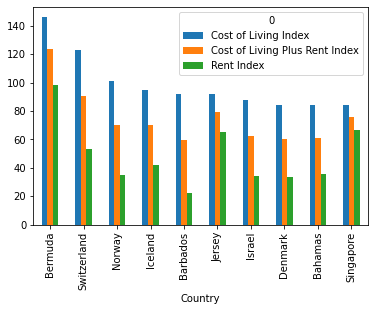

In [47]:
top10CL.plot.bar(x=None, y=['Cost of Living Index', 'Cost of Living Plus Rent Index', 'Rent Index'])


In [48]:
#top10CL.plot.line(x='Cost of Living Index', y='Cost of Living Plus Rent Index')

They follow similar trends, but not exactly the same. 

<AxesSubplot:xlabel='Country'>

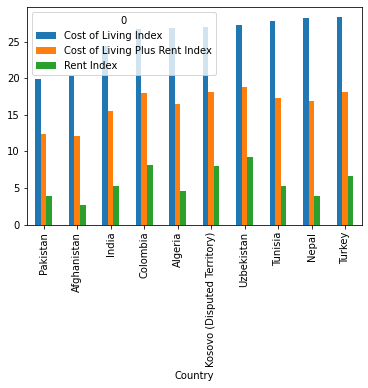

In [49]:
low10CL.plot.bar(x=None, y=['Cost of Living Index', 'Cost of Living Plus Rent Index', 'Rent Index'])


There is even less of a consistent trend between the indexes here. Rent does not seem to have the same degree of importance in each country (when you include it, it changes its 'ranking'/comparison to 'Cost of Living Index' sometimes, but not others).

# Groceries and eating out

Focusing on the df created for the top 10 cost of Living Index, top10CL, but now looking at the columns Groceries Index and Restaurant Price Index. I want to compare the two to see if there are correlations, i.e. if groceries index is high is restaurant price equally high or is it lower? Are people motivated to eat out more in these countries? Etc. Is there consistence in the trends? 

<AxesSubplot:xlabel='Country'>

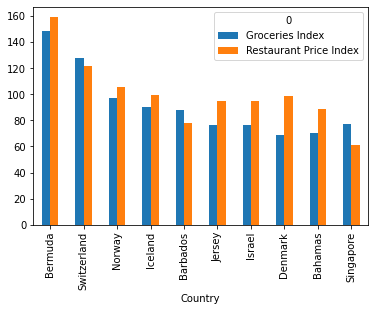

In [57]:
top10CL.plot.bar(x=None, y=['Groceries Index', 'Restaurant Price Index'])


Jersey, Israel, Denmark, the Bahamas, and Singapore all have wider gaps than the other five in the top ten, where the indexes tend to stay closer together. 

<AxesSubplot:xlabel='Country'>

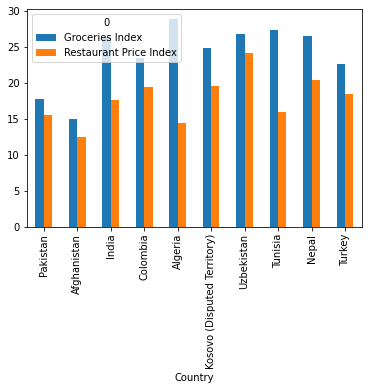

In [58]:
low10CL.plot.bar(x=None, y=['Groceries Index', 'Restaurant Price Index'])


This graph is where for the countries with the lowest cost of living, and the gaps are even wider, and noticably, groceries are always more expensive, sometimes widely so, like with Algeria or Tunisia. Eating at a restaurant in these countries is cheaper than buying groceries. This trend is something that I would definitely want to investigate further in the data to see if it holds up, where a reversal occurs, etc. My hypothesis is that the grocery index would continue to be higher than the restaurant price index for a while, but that at some point it would reverse and that restaurants would be more expensive in more expensive countries. 